Importing Modules

In [57]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import colorlover as cl
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind, pearsonr, linregress
from scipy.optimize import curve_fit
import kaleido
import os as os

from sklearn.metrics import r2_score 

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import math as math

In [58]:
def LinRegress(X, Y):
    data = pd.DataFrame({'x':X, 'y': Y})
    model = ols("y ~ x", data).fit()
    return model

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

def linear_func(x, b,m):
    return (m*x)+b

Reading data

In [59]:
df = pd.read_csv('CSV/Global Land Temp/GlobalTemperatures.csv')

copy = df.copy() # backup of dataset

df.isna().sum() # 1200 values total are N/A

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Setting up dataframe 'earth_data' with data on a yearly basis

In [60]:
df.dropna(axis = 0, inplace = True) # delete all rows that have N/A values

df['Date'] = pd.to_datetime(df.dt) # convert [dt] to same format

df1 = df.copy()
df1.drop(columns = ['dt'], axis = 1, inplace = True)

df1['year'] = df1['Date'].dt.year

earth_data = df1.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
                                       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                                       'LandMinTemperature', 'LandMinTemperatureUncertainty',
                                       'LandAndOceanAverageTemperature',
                                       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'Pre', 'Post')

In [61]:
earth_data[['LandAverageTemperature', 'LandMaxTemperature',
            'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,166.000000,166.000000,166.000000,166.000000
mean,8.571583,14.350601,2.743595,15.212566
std,0.473687,0.447741,0.614124,0.298629
min,7.558583,13.081000,1.525083,14.740083
25%,8.195708,14.055917,2.262562,14.991208
50%,8.540750,14.307708,2.734917,15.144208
75%,8.791250,14.539167,3.126833,15.379104
max,9.831000,15.572667,4.148833,16.058583


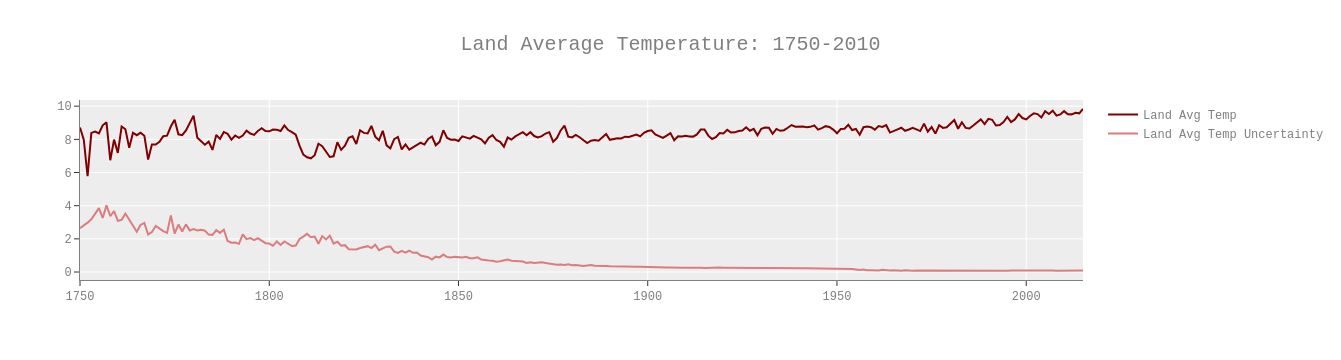

In [62]:
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()

fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                         name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                         name = 'Land Avg Temp Uncertainty', marker_color = 'rgb(220, 124, 124)'))

In [63]:
# regressions

X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandAverageTemperature']])

model = LinRegress(X['year'], y['LandAverageTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")

X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandAverageTemperature']])

model = LinRegress(X['year'], y['LandAverageTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")

X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandMinTemperature']])

model = LinRegress(X['year'], y['LandMinTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")

X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandMinTemperature']])

model = LinRegress(X['year'], y['LandMinTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")

X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandMaxTemperature']])

model = LinRegress(X['year'], y['LandMaxTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")

X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandMaxTemperature']])

model = LinRegress(X['year'], y['LandMaxTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")

X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandAndOceanAverageTemperature']])

model = LinRegress(X['year'], y['LandAndOceanAverageTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")

X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandAndOceanAverageTemperature']])

model = LinRegress(X['year'], y['LandAndOceanAverageTemperature'])

b,m = model._results.params
r = model.rsquared
t = model._results.tvalues[1]

print(f"y = {m}*x+{b}")
print(f"R² = {r}")
print(f"t = {t}")


y = 0.006128872890888617*x+-3.349097710702752
R² = 0.5654470402317997
t = 12.702390330945263
y = 0.0272064314750292*x+-45.088812500000486
R² = 0.7868810722233232
t = 11.999850672600937
y = 0.008667839520059999*x+-14.102379325501008
R² = 0.6051789262943505
t = 13.786454067382413
y = 0.0220127032520327*x+-40.33668241869954
R² = 0.6974155001898371
t = 9.481013450015812
y = 0.005420925884264519*x+3.809077129942004
R² = 0.4467493444559112
t = 10.006491618474229
y = 0.030315795586527534*x+-45.593863821138875
R² = 0.80658026494
t = 12.752804655409932
y = 0.00357371303587052*x+8.248077390326301
R² = 0.5069104273144451
t = 11.290509635015125
y = 0.016417044134727023*x+-17.140019308943316
R² = 0.8348430113088081
t = 14.040618317839911


In [64]:
pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandAverageTemperature']])

,LandAverageTemperature
0,7.900667
1,8.178583
2,8.100167
3,8.041833
4,8.210500
...,...
121,8.599250
122,8.499583
123,8.948250
124,8.467500


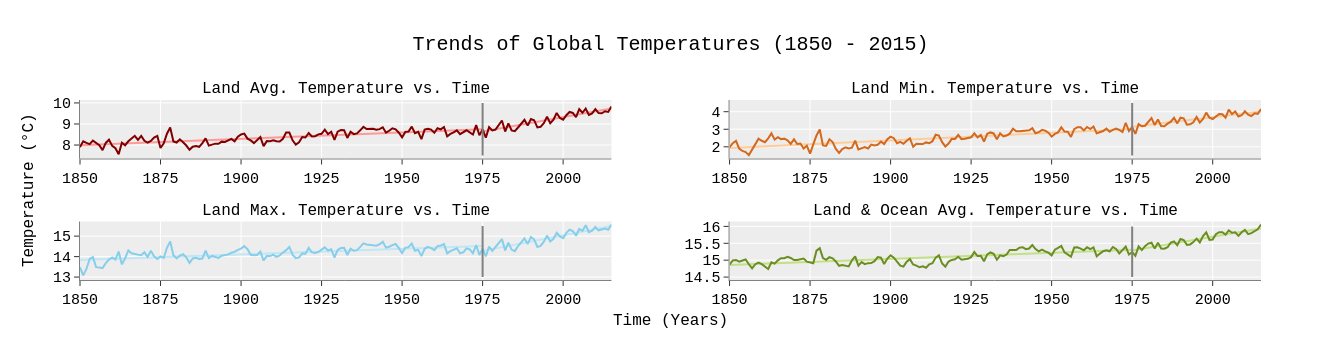

In [65]:
fig = make_subplots(rows=2, cols=2, 
   vertical_spacing = 0.35, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}], y_title = 'Temperature (°C)', x_title='Time (Years)', subplot_titles=('Land Avg. Temperature vs. Time',  'Land Min. Temperature vs. Time', 'Land Max. Temperature vs. Time', 'Land & Ocean Avg. Temperature vs. Time')
 )

fig.update_layout(title="Trends of Global Temperatures (1850 - 2015)",font=dict( family="Courier New, monospace", size=15,color="#000000"),
                  template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray',title_standoff = 5)
fig.update_xaxes(tickmode = 'linear', dtick = 25, showline=True, linewidth=1, linecolor='gray', title_standoff = 5)

X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandAverageTemperature']])
model = LinRegress(X['year'], y['LandAverageTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(255, 153, 153)'), row = 1, col = 1)
X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandAverageTemperature']])
model = LinRegress(X['year'], y['LandAverageTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(255, 153, 153)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                         showlegend=False, marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
              row = 1, col = 1)



X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandMinTemperature']])
model = LinRegress(X['year'], y['LandMinTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(255, 204, 153)'), row = 1, col = 2)
X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandMinTemperature']])
model = LinRegress(X['year'], y['LandMinTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(255, 204, 153)'), row = 1, col = 2)
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                         showlegend=False, marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
              row = 1, col = 2)



X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandMaxTemperature']])
model = LinRegress(X['year'], y['LandMaxTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(193, 231, 247)'), row = 2, col = 1)
X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandMaxTemperature']])
model = LinRegress(X['year'], y['LandMaxTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(193, 231, 247)'), row = 2, col = 1)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                         showlegend=False, marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
              row = 2, col = 1)



X = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1750,1975)][['LandAndOceanAverageTemperature']])
model = LinRegress(X['year'], y['LandAndOceanAverageTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(195, 224, 135)'), row = 2, col = 2)
X = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['year']])
y = pd.DataFrame(earth_data[earth_data['year'].between(1975,2015)][['LandAndOceanAverageTemperature']])
model = LinRegress(X['year'], y['LandAndOceanAverageTemperature'])
yy= linear_func(X['year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['year'], y = yy, mode = 'lines',
                         showlegend=False, marker_color='rgb(195, 224, 135)'), row = 2, col = 2)
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        showlegend=False, marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
              row = 2, col = 2)
pio.write_image(fig, "images/fig1.png", width=5*200, height=2*200, scale=.75)
fig

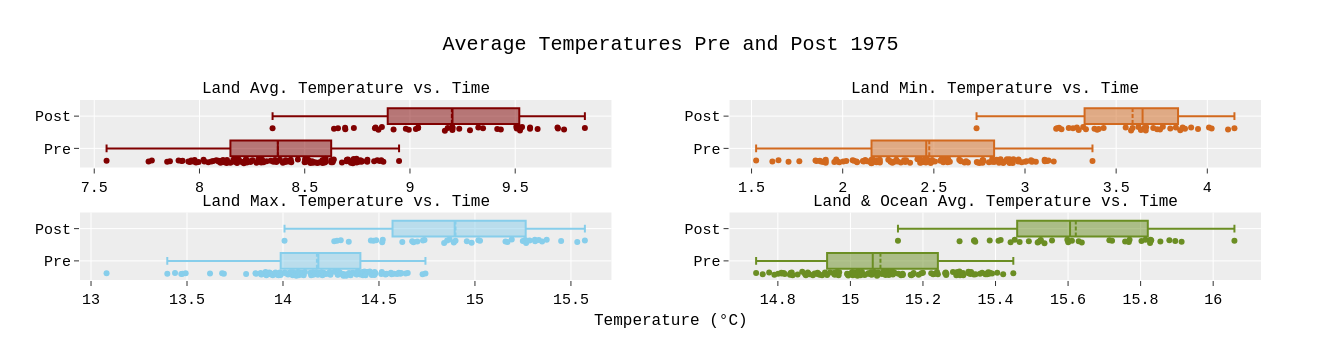

In [66]:
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}], x_title = 'Temperature (°C)', subplot_titles=('Land Avg. Temperature vs. Time',  'Land Min. Temperature vs. Time', 'Land Max. Temperature vs. Time', 'Land & Ocean Avg. Temperature vs. Time'))
fig.update_layout(title="Average Temperatures Pre and Post 1975",font=dict( family="Courier New, monospace", size=15,color="#000000"),
                  template = "ggplot2", title_font_size = 20, hovermode= 'closest')

fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, showlegend=False),
              row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, showlegend=False),
              row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, showlegend=False),
              row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, showlegend=False),
              row = 2, col = 2)


fig.update_traces(orientation='h')
pio.write_image(fig, "images/fig2.png", width=5*200, height=2*200, scale=.75)
fig

t-test

In [67]:
def get_season(month):
    
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

In [68]:
df2 = df1.copy()
df2['Season'] = df2['Date'].dt.month.apply(get_season)
df2 = df2.sort_values(by='year')


season = df2.groupby(by = ['year', 'Season'])[['LandAverageTemperature']].mean().reset_index()
spring = season[season['Season'] == 'Spring']
winter = season[season['Season'] == 'Winter']
summer = season[season['Season'] == 'Summer']
fall = season[season['Season'] == 'Autumn']

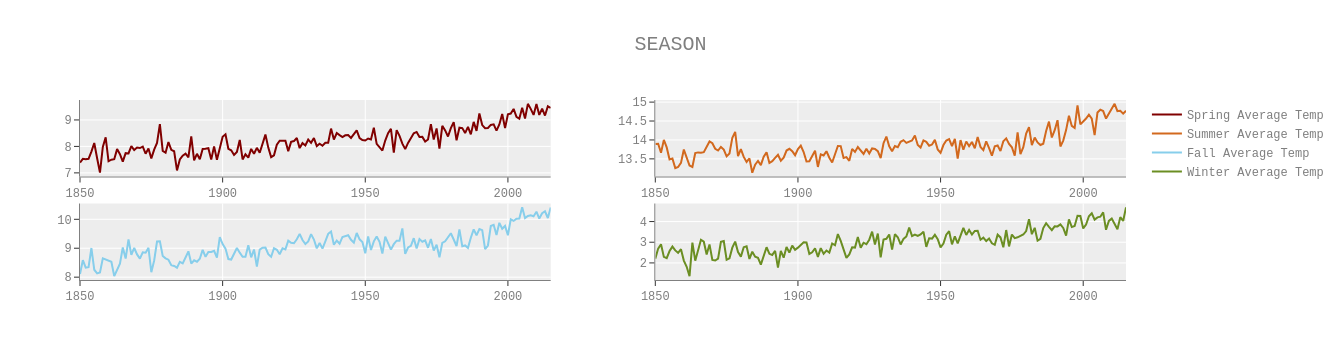

In [69]:
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="SEASON",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = spring['year'], y = spring['LandAverageTemperature'], mode = 'lines',
                         name = 'Spring Average Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)


fig.add_trace(go.Scatter(x = summer['year'], y = summer['LandAverageTemperature'], mode = 'lines',
                         name = 'Summer Average Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)


fig.add_trace(go.Scatter(x = fall['year'], y = fall['LandAverageTemperature'], mode = 'lines',
                         name = 'Fall Average Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)


fig.add_trace(go.Scatter(x = winter['year'], y = winter['LandAverageTemperature'], mode = 'lines',
                         name = 'Winter Average Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)

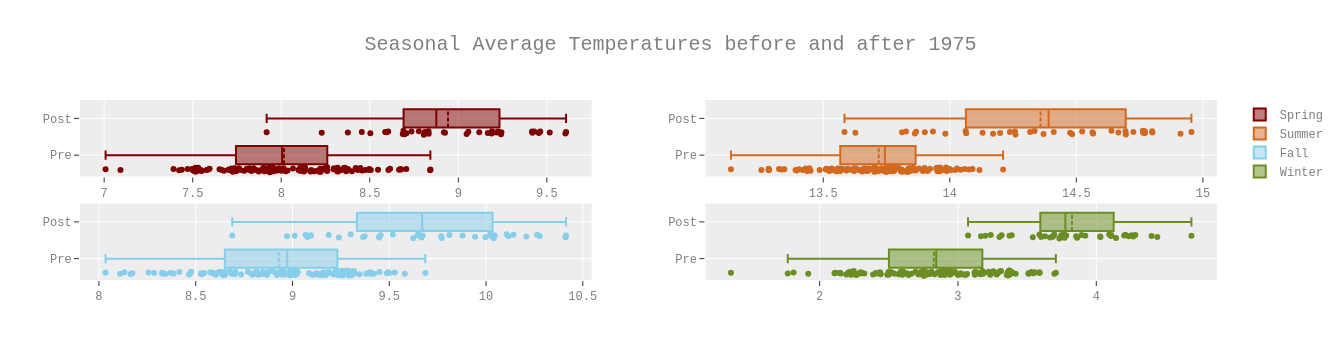

In [70]:
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Seasonal Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", title_font_size = 20, hovermode= 'closest')

fig.add_trace(go.Box(x = spring['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Spring'),
              row = 1, col = 1)
fig.add_trace(go.Box(x = summer['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Summer'),
              row = 1, col = 2)
fig.add_trace(go.Box(x = fall['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Fall'),
              row = 2, col = 1)
fig.add_trace(go.Box(x = winter['LandAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3,
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Winter'),
              row = 2, col = 2)


fig.update_traces(orientation='h')

In [71]:
dfc = pd.read_csv('CSV/CO2 Concentration/CO2 Concentration.csv')
dfc.dropna(axis = 0, inplace = True)
dfc.drop(columns = 'Decimal Date', axis = 1, inplace = True)

dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 2 to 708
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               702 non-null    int64  
 1   Month                              702 non-null    int64  
 2   Carbon Dioxide (ppm)               702 non-null    float64
 3   Seasonally Adjusted CO2 (ppm)      702 non-null    float64
 4   Carbon Dioxide Fit (ppm)           702 non-null    float64
 5   Seasonally Adjusted CO2 Fit (ppm)  702 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 38.4 KB


Carbon data setup

In [72]:
carbon_year = dfc.groupby(by = 'Year')[['Carbon Dioxide (ppm)']].mean().reset_index()
carbon_month = dfc.groupby(by = ['Year', 'Month'])[['Carbon Dioxide (ppm)']]
carbon_season = dfc.copy()

carbon_season['Season'] = carbon_season['Month'].apply(get_season)


carbon_season = carbon_season.groupby(by = ['Year', 'Season'])[['Carbon Dioxide (ppm)']].mean().reset_index()

carbon_spring = carbon_season[carbon_season['Season'] == 'Spring']
carbon_summer = carbon_season[carbon_season['Season'] == 'Summer']
carbon_fall = carbon_season[carbon_season['Season'] == 'Autumn']
carbon_winter = carbon_season[carbon_season['Season'] == 'Winter']

In [73]:
popt, pcov = curve_fit(exponenial_func, carbon_year['Year'], carbon_year['Carbon Dioxide (ppm)'], p0=(1, 1e-6, 1), maxfev=10000)

In [74]:
yy = exponenial_func(carbon_year['Year'], *popt)
a, b, c = popt
b*=-1
print(f"y = {a}*e^{b}*x + {c}")
rSquared = r2_score(carbon_year['Carbon Dioxide (ppm)'], yy)
print(f"R² = {rSquared}")

y = 6.14506622218523e-13*e^0.016418987055116834*x + 257.6808192876246
R² = 0.9993669394340178


In [75]:
X = carbon_year['Year']
y = carbon_year['Carbon Dioxide (ppm)']

data = pd.DataFrame({'x':X, 'y':y})
model = ols("y ~ x", data).fit()

print(model.summary())

yyy= linear_func(X, *model._results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3442.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           2.41e-53
Time:                        13:04:49   Log-Likelihood:                -159.51
No. Observations:                  60   AIC:                             323.0
Df Residuals:                      58   BIC:                             327.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2701.1414     52.054    -51.891      0.0

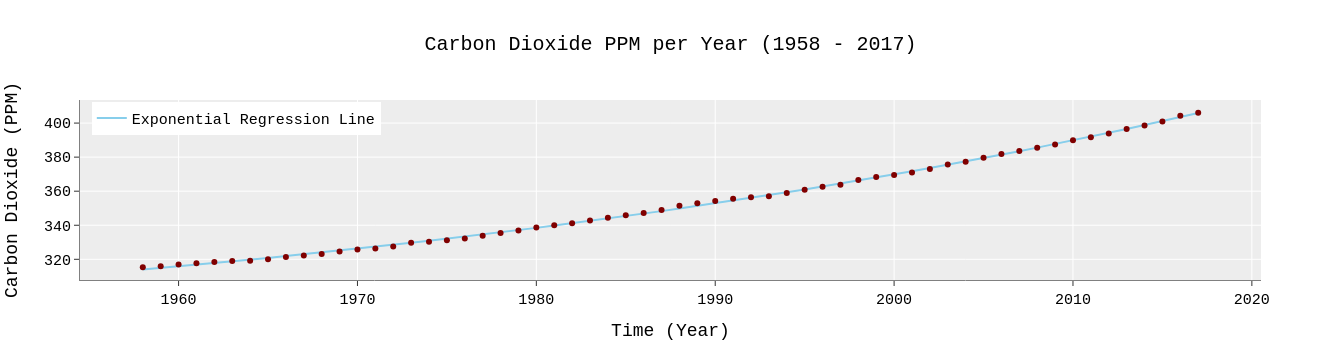

In [76]:
fig = go.Figure()
fig.update_layout(title="Carbon Dioxide PPM per Year (1958 - 2017)", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=15,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Time (Year)')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Carbon Dioxide (PPM)')

fig.add_trace(go.Scatter(x = carbon_year['Year'], y = yy, mode = 'lines',
                         name = 'Exponential Regression Line', marker_color='rgb(135,206,235)'))
fig.add_trace(go.Scatter(x = carbon_year['Year'], y = carbon_year['Carbon Dioxide (ppm)'], mode = 'markers',
                         showlegend=False, marker_color='rgb(128, 0, 0)'))

pio.write_image(fig, "images/fig3.png", width=5*200, height=2*200, scale=.75)
fig

In [77]:
# regression

X = carbon_year[carbon_year['Year'].between(1958,2015)][['Carbon Dioxide (ppm)']].reset_index()
Y = earth_data[earth_data['year'].between(1958,2015)][['LandAverageTemperature']].reset_index()

data = pd.DataFrame({'x':X['Carbon Dioxide (ppm)'], 'y':Y['LandAverageTemperature']})
model = ols("y ~ x", data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     247.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.42e-22
Time:                        13:04:49   Log-Likelihood:                 19.992
No. Observations:                  58   AIC:                            -35.98
Df Residuals:                      56   BIC:                            -31.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0617      0.317     12.816      0.0

In [78]:
yy = linear_func(carbon_year['Carbon Dioxide (ppm)'], *model._results.params)

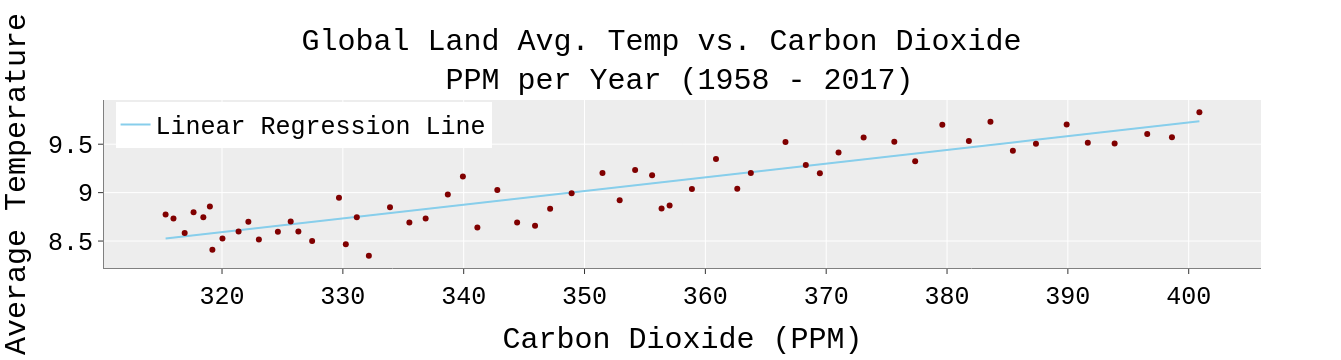

In [79]:
fig = go.Figure()
fig.update_layout(title="Global Land Avg. Temp vs. Carbon Dioxide <br> PPM per Year (1958 - 2017)", title_font_size = 30,
                  font=dict( family="Courier New, monospace", size=25,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Carbon Dioxide (PPM)')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Land Average Temperature (°C)')

fig.add_trace(go.Scatter(x = X['Carbon Dioxide (ppm)'], y=yy, mode = 'lines',
                         name = 'Linear Regression Line', marker_color='rgb(135,206,235)'))
fig.add_trace(go.Scatter(x = X['Carbon Dioxide (ppm)'], y=Y['LandAverageTemperature'], mode = 'markers',
                         showlegend=False, marker_color='rgb(128, 0, 0)'))

pio.write_image(fig, "images/fig4.png", width=5*200, height=2*200, scale=.75)
pio.write_image(fig, "images/fig4poster.png", width=8.2*100, height=6.5*100, scale=.5)

fig

In [80]:
ttest_ind(carbon_year['Carbon Dioxide (ppm)'], earth_data['LandAverageTemperature'], equal_var=False)

TtestResult(statistic=98.52359281618298, pvalue=3.53057018362972e-67, df=59.0130697259365)

In [81]:
carboncorr = carbon_year[carbon_year['Year'].between(1958,2015)]
carboncorr = carboncorr.rename(columns={'Year':'year', 'Carbon Dioxide (ppm)':'data'})
tempcorr = earth_data[earth_data['year'].between(1958,2015)][['year', 'LandAverageTemperature']]
tempcorr = tempcorr.rename(columns={'LandAverageTemperature':'data'})

pearsonr(tempcorr['data'], carboncorr['data'])

PearsonRResult(statistic=0.9029036493033984, pvalue=3.419292892722034e-22)

In [82]:
df_disasters = pd.read_csv('CSV/Hurricane Count/hurricanes.csv')

In [83]:
df_disasters

,Unnamed: 0,Year,Named Storms,Hurricanes,MajorHurricanes
0,1,1851,6,3,1
1,2,1852,5,5,1
2,3,1853,8,4,2
3,4,1854,5,3,1
4,5,1855,5,4,1
...,...,...,...,...,...
162,163,2013,14,2,0
163,164,2014,8,6,2
164,165,2015,11,4,2
165,166,2016,15,7,4


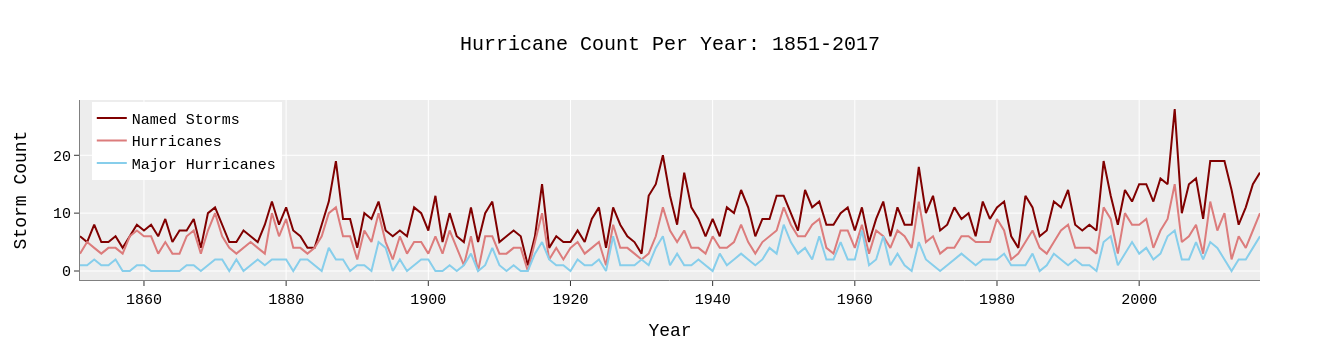

In [84]:
fig = go.Figure()
fig.update_layout(title="Hurricane Count Per Year: 1851-2017", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=15,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Year')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Storm Count')

fig.add_trace(go.Scatter(x = df_disasters['Year'], y = df_disasters['Named Storms'], mode = 'lines',
                         name = 'Named Storms', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = df_disasters['Year'], y = df_disasters['Hurricanes'], mode = 'lines',
                         name = 'Hurricanes', marker_color = 'rgb(220, 124, 124)'))

fig.add_trace(go.Scatter(x = df_disasters['Year'], y = df_disasters['MajorHurricanes'], mode = 'lines',
                         name = 'Major Hurricanes', marker_color = 'rgb(135,206,235)'))

pio.write_image(fig, "images/fig5.png", width=5*200, height=2*200, scale=.75)
fig

In [85]:
pio.write_image(fig, "images/fig5.png", width=5*200, height=2*200, scale=.75)

In [86]:
dd = df_disasters[df_disasters['Year'].between(1958,2015)][['Year','Named Storms', 'Hurricanes', 'MajorHurricanes']].reset_index()

In [87]:
dd.columns

Index(['index', 'Year', 'Named Storms', 'Hurricanes', 'MajorHurricanes'], dtype='object')

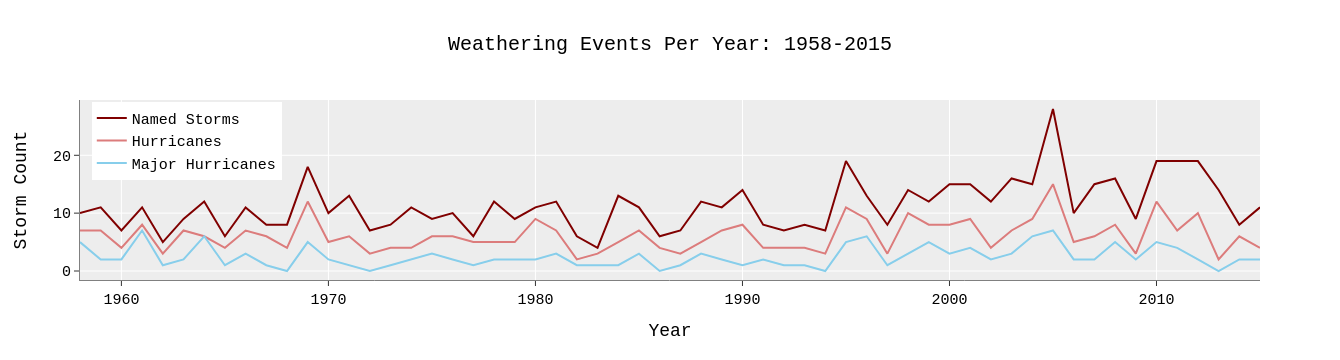

In [88]:
fig = go.Figure()
fig.update_layout(title="Weathering Events Per Year: 1958-2015", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=15,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Year')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Storm Count')

fig.add_trace(go.Scatter(x = dd['Year'], y = dd['Named Storms'], mode = 'lines',
                         name = 'Named Storms', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = dd['Year'], y = dd['Hurricanes'], mode = 'lines',
                         name = 'Hurricanes', marker_color = 'rgb(220, 124, 124)'))

fig.add_trace(go.Scatter(x = dd['Year'], y = dd['MajorHurricanes'], mode = 'lines',
                         name = 'Major Hurricanes', marker_color = 'rgb(135,206,235)'))

pio.write_image(fig, "images/fig6.png", width=5*200, height=2*200, scale=.75)
fig

In [89]:
X = pd.DataFrame(dd[dd['Year'].between(1958,1975)][['Year']])
Y = pd.DataFrame(dd[dd['Year'].between(1958,1975)][['Named Storms']])
data = pd.DataFrame({'x':X['Year'], 'y': Y['Named Storms']})
model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.2256
Date:                Sun, 28 Jan 2024   Prob (F-statistic):              0.641
Time:                        13:04:50   Log-Likelihood:                -44.616
No. Observations:                  18   AIC:                             93.23
Df Residuals:                      16   BIC:                             95.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -120.2157    273.445     -0.440      0.6

/home/leo/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



In [90]:
X = pd.DataFrame(dd[dd['Year'].between(1975,2015)][['Year']])
Y = pd.DataFrame(dd[dd['Year'].between(1975,2015)][['Named Storms']])
data = pd.DataFrame({'x':X['Year'], 'y': Y['Named Storms']})
model = ols("y ~ x", data).fit()
print(model.summary())
bb = linear_func(X, *model._results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     13.02
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           0.000864
Time:                        13:04:50   Log-Likelihood:                -115.22
No. Observations:                  41   AIC:                             234.4
Df Residuals:                      39   BIC:                             237.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -379.7500    108.542     -3.499      0.0

In [91]:
X = dd['Year']
Y = dd['Named Storms']
data = pd.DataFrame({'x':X, 'y': Y})
model = ols("y ~ x", data).fit()
print(model.summary())
cc = linear_func(X, *model._results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     15.15
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           0.000267
Time:                        13:04:50   Log-Likelihood:                -160.59
No. Observations:                  58   AIC:                             325.2
Df Residuals:                      56   BIC:                             329.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -226.7154     61.157     -3.707      0.0

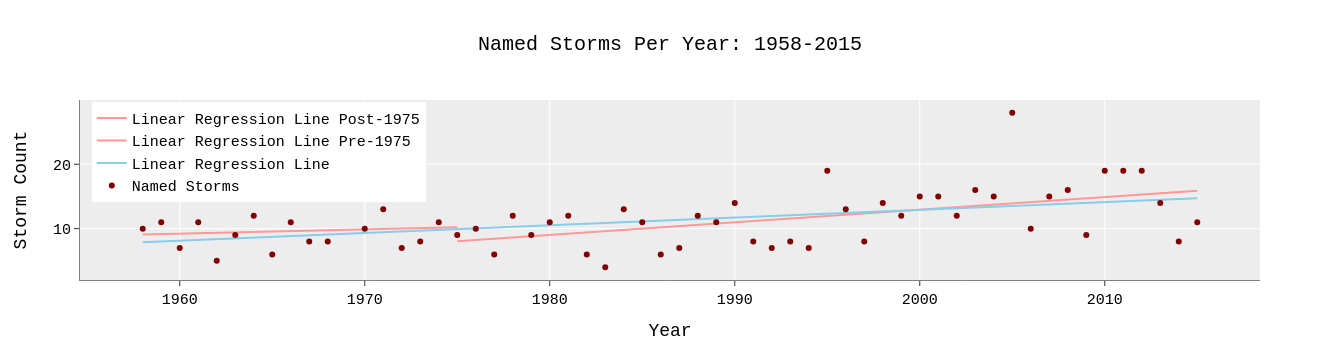

In [92]:
fig = go.Figure()
fig.update_layout(title="Named Storms Per Year: 1958-2015", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=15,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Year')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Storm Count')


X = pd.DataFrame(dd[dd['Year'].between(1975,2015)][['Year']])
Y = pd.DataFrame(dd[dd['Year'].between(1975,2015)][['Named Storms']])
data = pd.DataFrame({'x':X['Year'], 'y': Y['Named Storms']})
model = ols("y ~ x", data).fit()
aa = linear_func(X['Year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['Year'], y = aa, mode = 'lines',
                         name = 'Linear Regression Line Post-1975', marker_color='rgb(255, 153, 153)'))

X = pd.DataFrame(dd[dd['Year'].between(1958,1975)][['Year']])
Y = pd.DataFrame(dd[dd['Year'].between(1958,1975)][['Named Storms']])
data = pd.DataFrame({'x':X['Year'], 'y': Y['Named Storms']})
model = ols("y ~ x", data).fit()
aa = linear_func(X['Year'], *model._results.params)
fig.add_trace(go.Scatter(x = X['Year'], y = aa, mode = 'lines',
                         name = 'Linear Regression Line Pre-1975', marker_color='rgb(255, 153, 153)'))

fig.add_trace(go.Scatter(x = dd['Year'], y = cc, mode = 'lines',
                         name = 'Linear Regression Line', marker_color='rgb(135,206,235)'))
fig.add_trace(go.Scatter(x = dd['Year'], y = dd['Named Storms'], mode = 'markers',
                         name = 'Named Storms', marker_color='rgb(128, 0, 0)'))

pio.write_image(fig, "images/fig7.png", width=5*200, height=2*200, scale=.75)
fig

In [93]:
X = carbon_year[carbon_year['Year'].between(1958,2015)][['Carbon Dioxide (ppm)']].reset_index()

In [94]:
data = pd.DataFrame({'x':X['Carbon Dioxide (ppm)'], 'y': dd['Named Storms']})
model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     16.49
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           0.000154
Time:                        13:04:50   Log-Likelihood:                -160.05
No. Observations:                  58   AIC:                             324.1
Df Residuals:                      56   BIC:                             328.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.3148      7.064     -2.451      0.0

In [95]:
yy = linear_func(carbon_year['Carbon Dioxide (ppm)'], *model._results.params)

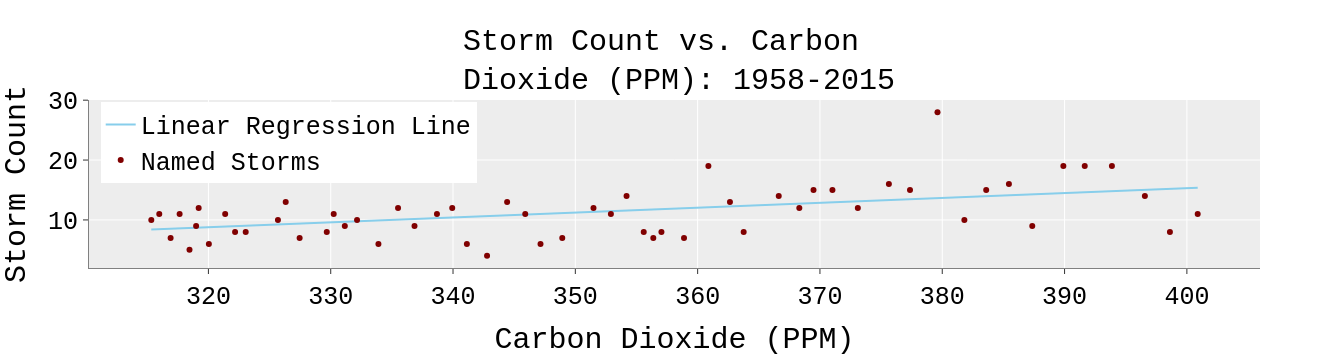

In [96]:
fig = go.Figure()
fig.update_layout(title="Storm Count vs. Carbon <br> Dioxide (PPM): 1958-2015", title_font_size = 30,
                  font=dict( family="Courier New, monospace", size=25,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Carbon Dioxide (PPM)')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Storm Count')

fig.add_trace(go.Scatter(x = X['Carbon Dioxide (ppm)'], y = yy, mode = 'lines',
                         name = 'Linear Regression Line', marker_color='rgb(135,206,235)'))
fig.add_trace(go.Scatter(x = X['Carbon Dioxide (ppm)'], y = dd['Named Storms'], mode = 'markers',
                         name = 'Named Storms', marker_color='rgb(128, 0, 0)'))

pio.write_image(fig, "images/fig8.png", width=5*200, height=2*200, scale=.75)
pio.write_image(fig, "images/fig8poster.png", width=8.2*100, height=6.5*100, scale=.5)
fig

In [97]:
ttest_ind(X['Carbon Dioxide (ppm)'],  dd['Named Storms'], equal_var=False)

TtestResult(statistic=99.38705944503397, pvalue=1.3955719840235152e-68, df=60.32722121367262)

In [98]:
pearsonr(X['Carbon Dioxide (ppm)'],  dd['Named Storms'])

PearsonRResult(statistic=0.4769169575128025, pvalue=0.00015376067320839148)

In [99]:
X = earth_data[earth_data['year'].between(1958,2015)][['LandAverageTemperature']].reset_index()

In [100]:
data = pd.DataFrame({'x':X['LandAverageTemperature'], 'y': dd['Named Storms']})
model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     20.43
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.25e-05
Time:                        13:04:50   Log-Likelihood:                -158.51
No. Observations:                  58   AIC:                             321.0
Df Residuals:                      56   BIC:                             325.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.5964     11.271     -3.513      0.0

In [101]:
yy = linear_func(X['LandAverageTemperature'], *model._results.params)

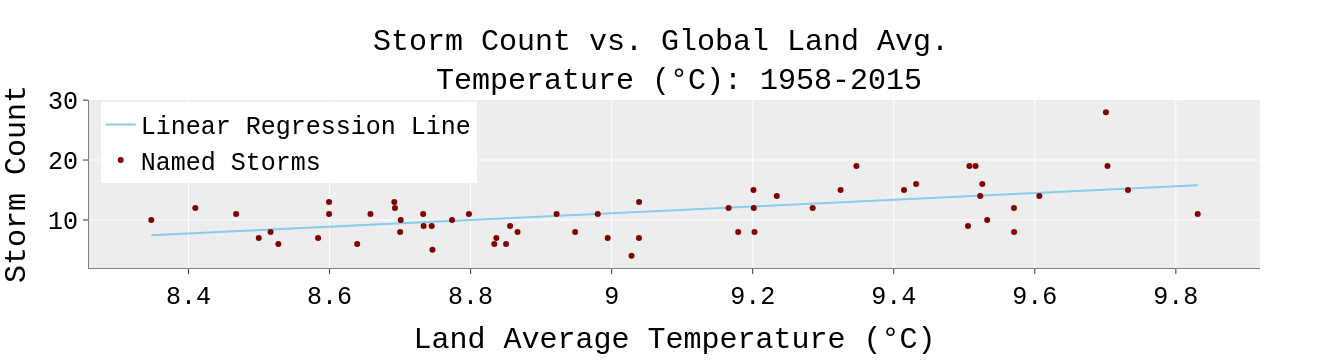

In [102]:
fig = go.Figure()
fig.update_layout(title="Storm Count vs. Global Land Avg. <br> Temperature (°C): 1958-2015", title_font_size = 30,
                  font=dict( family="Courier New, monospace", size=25,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Land Average Temperature (°C)')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Storm Count')


fig.add_trace(go.Scatter(x = X['LandAverageTemperature'], y = yy, mode = 'lines',
                         name = 'Linear Regression Line', marker_color='rgb(135,206,235)'))
fig.add_trace(go.Scatter(x = X['LandAverageTemperature'], y = dd['Named Storms'], mode = 'markers',
                         name = 'Named Storms', marker_color='rgb(128, 0, 0)'))

pio.write_image(fig, "images/fig9.png", width=5*200, height=2*200, scale=.75)
pio.write_image(fig, "images/fig9poster.png", width=8.2*100, height=6.5*100, scale=.5)

fig

In [103]:
ttest_ind(X['LandAverageTemperature'],  dd['Named Storms'], equal_var=False)

TtestResult(statistic=-3.913404182556289, pvalue=0.0002417619731038433, df=57.9593816701293)

In [104]:
pearsonr(X['LandAverageTemperature'],  dd['Named Storms'])

PearsonRResult(statistic=0.5169887026609681, pvalue=3.2519631778154347e-05)

In [105]:
data = { 
    "Years": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035]
}
def model(x):
    return 0.0142*(6.14506622218523*pow(10,-13)*pow(math.e, (0.016418987055116834*x)) + 257.6808192876246)+4.0617
datadf = pd.DataFrame(data)
aa = model(datadf["Years"])

In [106]:
Y = earth_data[earth_data['year'].between(2000,2014)][['LandAverageTemperature']].reset_index()
X = earth_data[earth_data['year'].between(2000,2015)][['year']].reset_index()

In [107]:
Y.loc[len(df.index)] = [2015, 9.758401]

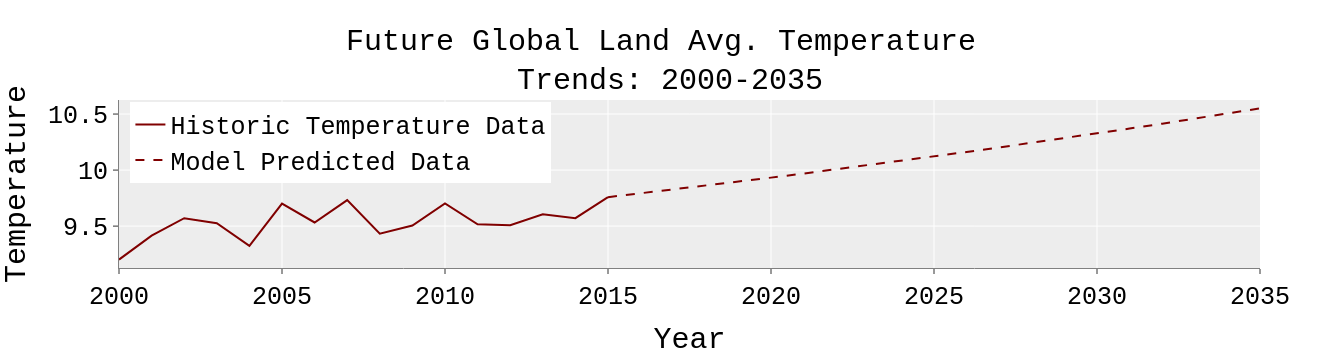

In [108]:
fig = go.Figure()
fig.update_layout(title="Future Global Land Avg. Temperature Trends: 2000-2035", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=15,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', title = 'Year')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', title = 'Temperature')

fig.add_trace(go.Scatter(x = X['year'], y = Y['LandAverageTemperature'], mode = 'lines',
                         name = 'Historic Temperature Data', marker_color='rgb(128, 0, 0)'))
fig.add_trace(go.Scatter(x = datadf["Years"], y = aa, name = 'Model Predicted Data', line=dict(
                          color='rgb(128, 0, 0)', dash='dash')))

pio.write_image(fig, "images/fig10.png", width=5*200, height=2*200, scale=.75)
fig.update_layout(title="Future Global Land Avg. Temperature <br>Trends: 2000-2035", title_font_size = 30,
                  font=dict( family="Courier New, monospace", size=25,color="#000000"),
                  template = "ggplot2", hovermode= 'closest', legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
pio.write_image(fig, "images/fig10poster.png", width=8.2*100, height=6.5*100, scale=.5)
fig